In [1]:
ENV["JULIA_REVISE"] = "manual" 
using Revise
using Probabilistic

In [2]:
revise()

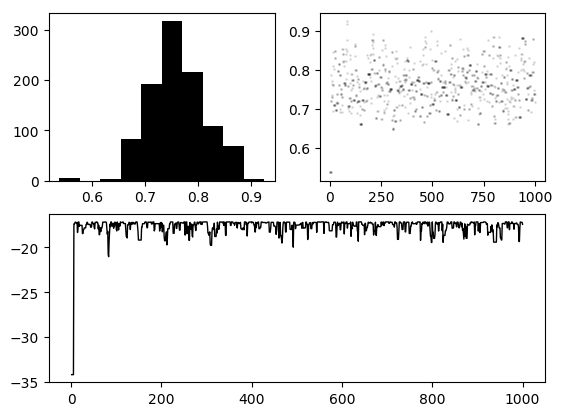

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f2405a1cc10>

In [2]:
brownian = @model N begin
    σ ~ Beta(2, 3)
    x = zeros(N)
    for i = 2:N
       x[i] ~ Normal(x[i-1], σ^2)
    end
end

N = 20
X = cumsum((0.75^2)*randn(N))

result = sample(brownian(N) |> condition(:x => X) |> observe(:σ), Metropolis(1_000))
plotresult(result)

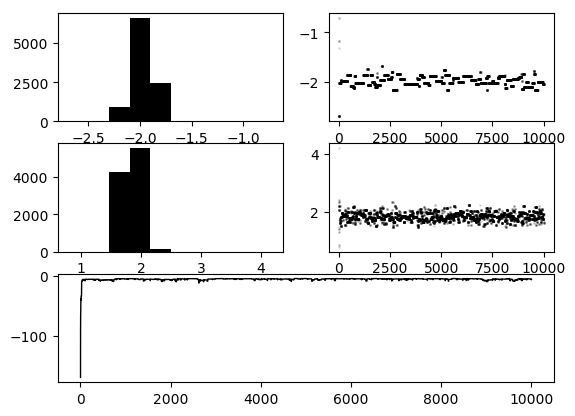

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f240253e410>

In [3]:
mix = @model N begin
    prob ~ Beta(2, 2)

    mean0 ~ Normal(-1,1)
    mean1 ~ Normal(1,1)

    x = zeros(N)
    for i = 1:N
        x[i] ~ BiMix(prob, Normal(mean0, 0.2), Normal(mean1, 0.2))
    end
end

obs = [-1.7, -1.8, -2.01, -2.4, 1.9, 1.8]
N = length(obs)

result = sample(mix(N) |> condition(:x => obs) |> observe(:mean0, :mean1),
                Metropolis(10_000))
plotresult(result)